## Resposible AI - Exploratory Data Analysis




This notebook will address one of the major areas where bias can come into the machine learning cycle. Bias in the dataset itself.

A dataset that is bias wil definitely lead to a bias model. Hence, in this notebook we will focus on Exploratory Data Analysis to visually analyse the dataset and check for inconsistencies and bias.


__Dataset:__
The dataset used in this notebook was gotten from a kaggle competition (https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan).

__Problem Statement:__
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers (adapted from kaggle).

__Aim & Objectives:__
To explore the dataset with the goal of identifying potential bias in the dataset that can affect the AI model

In [1]:
# import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '.5'})

import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Check how many rows and columns we have in the data frame
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (614, 13)


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Model Target vs. Model Features

In [5]:
model_target = 'Loan_Status'
model_target_col = df["Loan_Status"]
model_features = df.drop('Loan_Status', axis = 1)

print('Model features:', model_features)
print('Model targert:', model_target)

Model features:       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       

#### Checking that the target column is not part of the features

This is an important step to take in every machine laerning model building. It ensures that the data to be fed into the model is actually free from the labels which might introduce some bias into it.

If the output is False, then we are good to go. If however the output is `True`, we will implement `model_features.remove(model_target)` which will then remove the target from the features.


In [6]:
model_target in model_features

False

## Exploring the nuances of the dataset

### 1. Target distribution

In [7]:
model_target_col

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

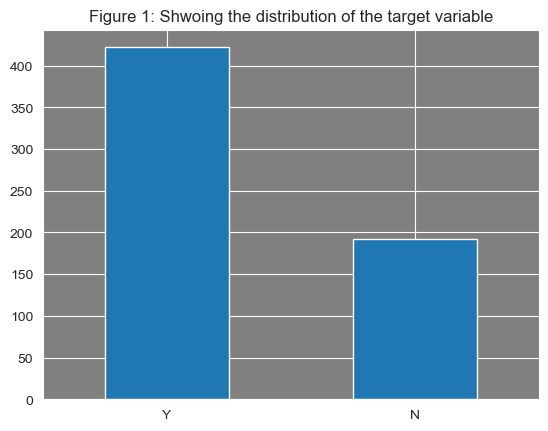

In [8]:
model_target_col.value_counts().plot.bar()

plt.title('Figure 1: Shwoing the distribution of the target variable')

plt.xticks(rotation = 0)
plt.show()

__Observation:__

It can be oberved from `Figure 1` that the target column is not equal, i.e. there is a underrepresentation. The number of datapoints for '_No_' is clearly not up to '_Yes_'. This can be a case of Data Misrepresentation of 'known_unknown" and __MUST__ be accounted for before being fed into the model

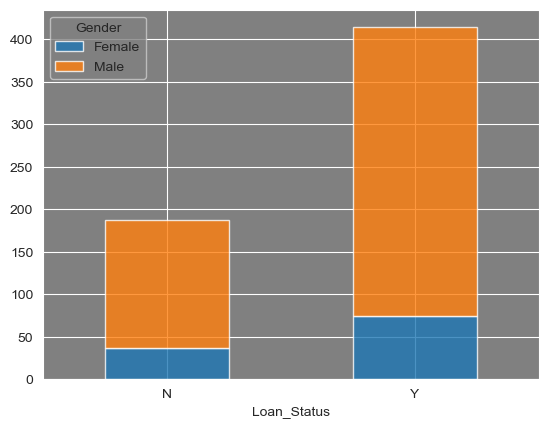

In [9]:
# Setting a color map for the different categories that we intend to plot
# cmap = sns.set_palette('husl', 7)

# Grouping based on certain other features in the dataset
df.groupby([model_target_col, 'Gender'])['Gender'].count().unstack().plot(kind='bar', stacked = True, alpha = 0.8)


plt.xticks(rotation = 0)
plt.show()

__Observation__: It is evident from the graph above the concept of __Demographic Disparity__. From above, males are more likely to get approval for their loan, but at the same time, they are also at high risk of getting rejected when compared to the females. What could be the reason behind this? Is it the paucity of dataset that represent the females in this dataset? we will definitely need to explore this further.

### 2. Distribution of features

This dataset is not so sensitive based on the nature of columns that are in it. This means that the columns are modifiable factors e.g. income, property_area etc as against non-modifiable factors like race amongst other which ML models are usually bias towards. hence, we will explore further, a couple more columns.

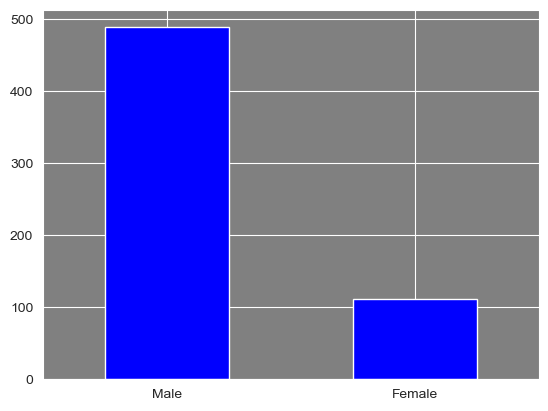

In [10]:
df['Gender'].value_counts().plot.bar(color = 'blue')
plt.xticks(rotation = 0)
plt.show()

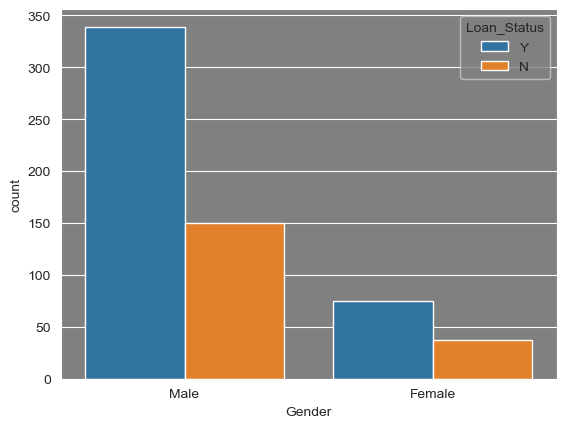

In [11]:
#cross-tabulating gender and the eligibility
sns.countplot(x="Gender", hue=model_target, data=df, dodge=True)

plt.show()

To be able to make accurate claims on this dataset, we will convert it into percentages to allow for more proper comparison

In [12]:
perc_df = pd.DataFrame(df.groupby("Gender")[model_target].value_counts()).rename({model_target: "count"}, axis=1)

# Calculate percentage total
perc_df["count"] / perc_df.groupby("Gender")["count"].transform("sum")

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: count, dtype: float64

__Observation:__

About 67% of females have a 'Y' loan status, while 33% have an 'N' loan status.

About 69% of males have a 'Y' loan status, while about 31% have an 'N' loan status.

This suggests that a slightly higher proportion of males have a 'Y' loan status compared to females in the given dataset. With this analysis, it shows that the data is not so biased to the gender as it was initially thought from the bar chart only.

__Conclusion__

In this dataset, both male and female have an equal chance of getting approved of the loan of not.

### 2.1 Marital Status and Loan Approval

Ideally I do not expect to see a significant difference in loan approval based on marital status. Let us test is that hypothesis is correct?

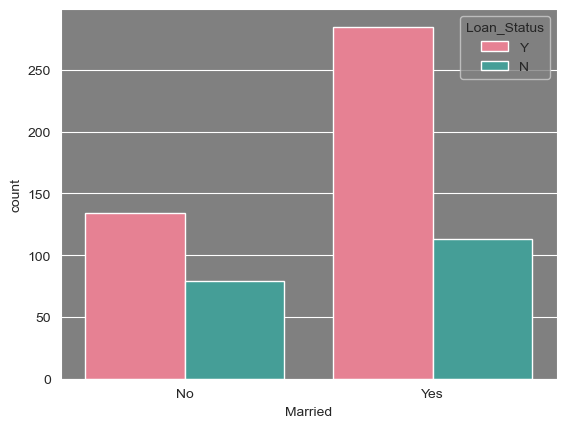

In [13]:
sns.countplot(x="Married", hue=model_target, data=df, palette="husl", dodge=True)

plt.show()

In [14]:
perc_df = pd.DataFrame(df.groupby("Married")[model_target].value_counts()).rename({model_target: "count"}, axis=1)

# Calculate percentage total
perc_df["count"] / perc_df.groupby("Married")["count"].transform("sum")

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: count, dtype: float64

__Observation:__ There is a big disparity between marital status of applicants and their eligibility for loan approval. More married people have higher likelihood of getting the loan as against applicants who are not married.

__Conclusion:__ Marital status is a determinant of loan approval in this dataset, does it really correlate with real life scenario?

### 2.2 Dependents and Loan Approval

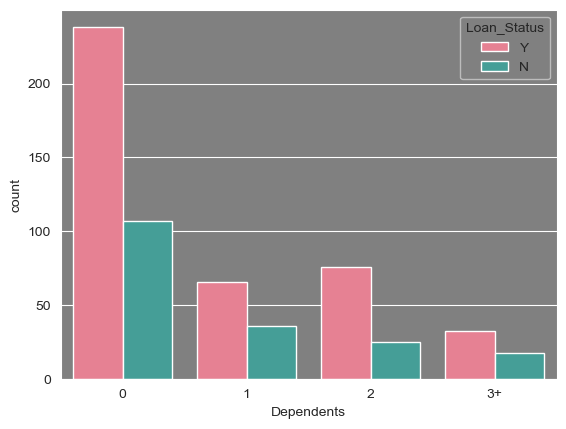

In [15]:
sns.countplot(x="Dependents", hue=model_target, data=df, palette="husl", dodge=True)

plt.show()

__Observation__: This count plot shows that those wuth no dependents where more likely to be approved, same way they were more likely to be disapproved. To be sure of what is happening, we need to calculate its frequency.

In [16]:
perc_df = pd.DataFrame(df.groupby("Dependents")[model_target].value_counts()).rename({model_target: "count"}, axis=1)

# Calculate percentage total
perc_df["count"] / perc_df.groupby("Dependents")["count"].transform("sum")

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: count, dtype: float64

__Observation:__ 

The outcome has a 70:30 split on all dependents which makes its fair on all the number of dependents, as they all each have the smae chances to be selected.

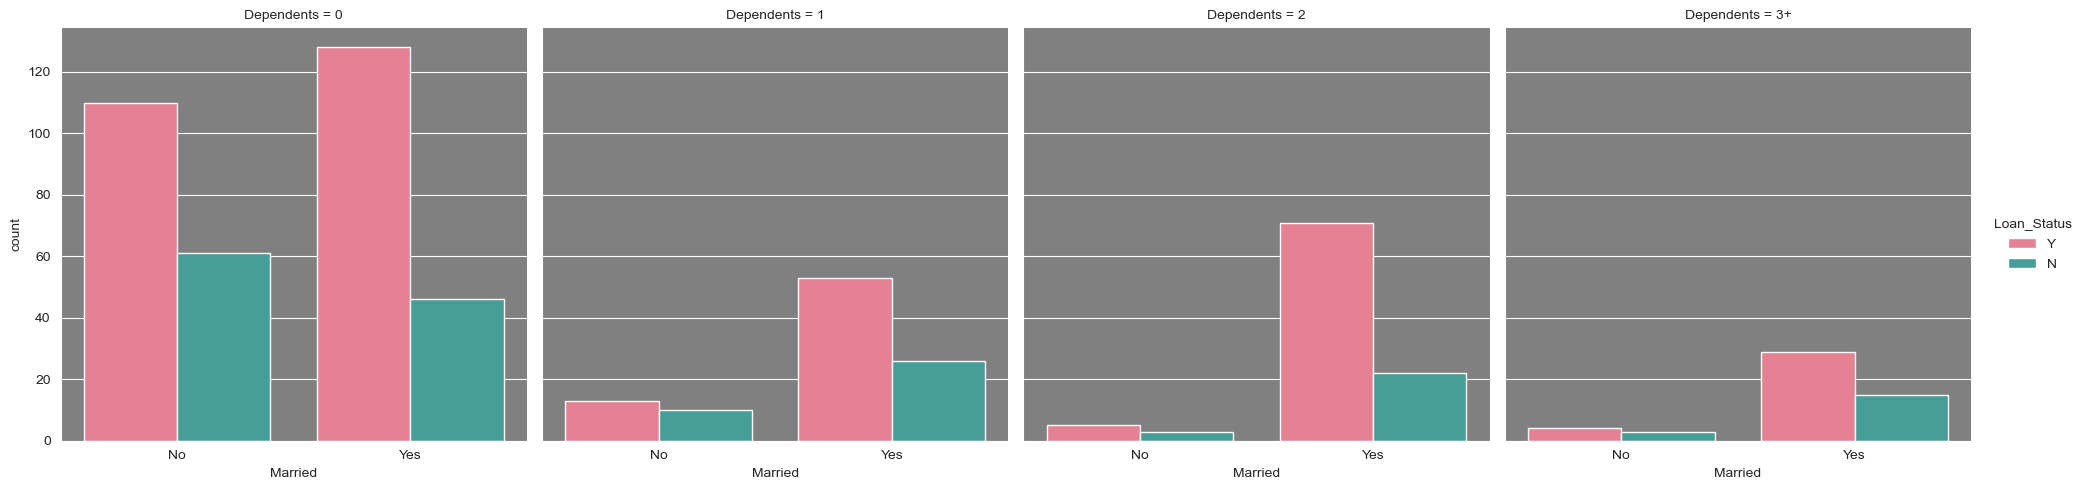

In [17]:
sns.catplot(x="Married", col="Dependents", kind="count", hue=model_target, data=df, palette="husl")
plt.show()

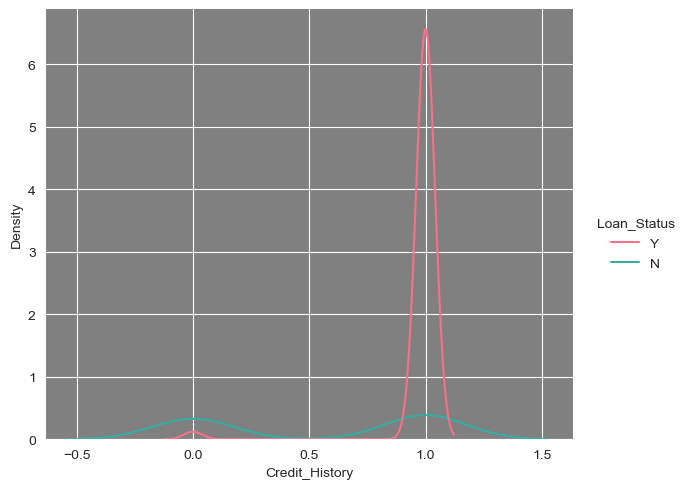

In [18]:
sns.displot(
    df,
    x="Credit_History",
    hue=model_target,
    aspect=1.2,
    kind="kde",
    palette=sns.color_palette("husl", 2),
)
plt.show()

<Figure size 700x600 with 0 Axes>

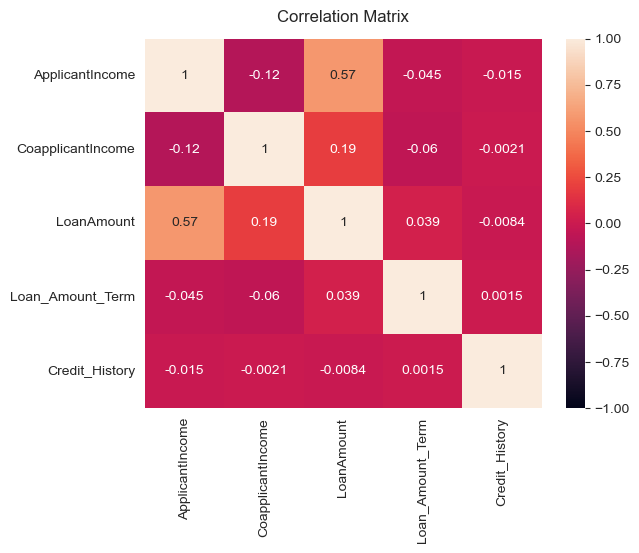

<Figure size 700x600 with 0 Axes>

In [19]:
# Correlation plot to check the relationship between all the numerical features in the dataset and it is expected to be between -1 and +1

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation Matrix", fontdict={"fontsize": 12}, pad=12)

plt.figure(figsize=(7, 6))

This notebook was deeply inspired by notebooks and lectures from Machine Learning University.